In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from scipy.spatial.distance import cdist

In [9]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from torchvision import transforms

from sklearn.preprocessing import Normalizer


tform1 = StandardScaler()
tform=transforms.Compose([
                           transforms.ToTensor()])
def fileFeedforGNN(name):

  data = pd.read_table(name)

  

  y = data.iloc[:,-3].values
  
  
  print(np.unique(y))


  graphList = []
  


    
  #num_objects	r_std	r_var	r_mean	r_min	r_max	snr_std	snr_var	snr_mean	snr_min	snr_max	noise_std	noise_var	noise_mean	noise_min	noise_max	obj	environment	
  X_array = data.iloc[:, 0:16].values

  X_array = tform1.fit_transform(X_array)
  

  addList_bot, addList_clothes, addList_plastics, addList_steel, addList_paper  = [],[],[],[],[]
    
  for i in range(len(X_array)):
    intarray = X_array[i]
    if(y[i] =='bot'):
      addList_bot.append(intarray)
    elif (y[i] == 'clothes'):
      addList_clothes.append(intarray)
    elif (y[i] == 'plastic'):
      addList_plastics.append(intarray)
    elif (y[i] == 'steel'):
      addList_steel.append(intarray)
    elif(y[i] == 'paper'):
         addList_paper.append(intarray)
        
  
  len_img = 10
  for i in range(len(addList_bot) - (len_img-1) ):
    
    
        #img = addList_bot[i]
        
        img = np.array(addList_bot[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))
        
        # if(i<1):
        #     print(img.shape)
        #     print(img)
        
        graphList.append((img,0))

  for i in range(len(addList_clothes)  - len_img-1):
    
        #img = addList_clothes[i]
    
        img = np.array(addList_clothes[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))      
        # if(i<1):
        #     print(img)
        
        graphList.append(((img),1))
        
  for i in range(len(addList_plastics) - len_img-1):
        
        #img = addList_plastics[i]
        img = np.array(addList_plastics[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))    
        # if(i<1):
        #     print(img)
            
        graphList.append(((img),2))
        
  for i in range(len(addList_steel) - len_img-1):
        #img = addList_steel[i]
    
        img = np.array(addList_steel[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))       
        # if(i<1):
        #     print(img)
        graphList.append(((img),3))
        
  for i in range(len(addList_paper) - len_img-1):
        #img = addList_steel[i]
    
        img = np.array(addList_paper[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))       
        # if(i<1):
        #     print(img)
        graphList.append(((img),3))
  
  
  
  print(len(graphList))
    
    
 
  return graphList


batch_size=64
test_batch_size=64

############################## data loading for 3.5 inch#####################

# graphList_lablight_3_5 = fileFeedforGNN('lablight_3.5_.txt')
# graphList_night_3_5 = fileFeedforGNN('night_3.5_.txt')
# graphList_sunny_3_5 = fileFeedforGNN('sunny_3.5_.txt')


# lablight_train_len = int(len(graphList_lablight_3_5)*0.7)
# night_train_len = int(len(graphList_night_3_5)*0.7)
# sunny_tarin_len = int(len(graphList_sunny_3_5)*0.7)


# batch_size=64
# test_batch_size=64

# random.shuffle(graphList_lablight_3_5)
# random.shuffle(graphList_night_3_5)
# random.shuffle(graphList_sunny_3_5)

# train_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[0:lablight_train_len],batch_size)  
# test_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[lablight_train_len:],test_batch_size) 

# train_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[0:night_train_len],batch_size)  
# test_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[night_train_len:],test_batch_size) 

# train_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[0:sunny_tarin_len],batch_size)  
# test_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[sunny_tarin_len:],test_batch_size) 

# print(len(graphList_lablight_3_5))
# print(len(graphList_night_3_5))
# print(len(graphList_sunny_3_5))



############################## data loading for 7 inch#####################

graphList_lablight_7= fileFeedforGNN('lablight_7_with_paper.txt')
graphList_night_7 = fileFeedforGNN('night_7_with_paper.txt')
graphList_sunny_7 = fileFeedforGNN('sunny_7_with_paper.txt')


lablight_train_len = int(len(graphList_lablight_7)*0.7)
night_train_len = int(len(graphList_night_7)*0.7)
sunny_tarin_len = int(len(graphList_sunny_7)*0.7)



random.shuffle(graphList_lablight_7)
random.shuffle(graphList_night_7)
random.shuffle(graphList_sunny_7)

train_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[0:lablight_train_len],batch_size)  
test_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[lablight_train_len:],test_batch_size) 

train_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[0:night_train_len],batch_size)  
test_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[night_train_len:],test_batch_size) 

train_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[0:sunny_tarin_len],batch_size)  
test_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[sunny_tarin_len:],test_batch_size) 

print(len(test_loader_sunny_7)*64)

print(len(graphList_lablight_7))
print(len(graphList_night_7))
print(len(graphList_sunny_7))


['bot' 'clothes' 'paper' 'plastic' 'steel']
4908
['bot' 'clothes' 'paper' 'plastic' 'steel']
4766
['bot' 'clothes' 'paper' 'plastic' 'steel']
4442
1344
4908
4766
4442


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 

class_labels = 4
classes = ('bot', 'clothes', 'plastic', 'steel')




# feature_vector_len = 16 # [num_objects,std,var,mean,min,max,enviroment]
# num_output_classes = 4


# Number_of_neurons = 16



#   model3 = nn.Sequential(
#       nn.Linear(feature_vector_len,Number_of_neurons),
#       nn.ReLU(),
#       nn.Linear(Number_of_neurons,Number_of_neurons),
#       nn.ReLU(),
#       nn.Linear(Number_of_neurons,num_output_classes),
#       nn.Softmax()
#       )
conv_row,conv_col = 1,13
out_channel = 1

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv1d(1, 1, 10,2)
        self.conv2 = nn.Conv1d(1, 1,10,2)
        self.conv3 = nn.Conv1d(1, 1, 10,2)
       
        
        self.fc1 = nn.Linear(conv_row*conv_col*out_channel,32)
        #self.fc2 = nn.Linear(64,32)
        
        self.fc3 = nn.Linear(32,16)
        self.fc4 = nn.Linear(16,4)
        

    def forward(self, x):

        
        #print(x.shape)
        x = F.relu(self.conv1(x))

        #print(x.shape)
    
        x = F.relu(self.conv2(x))  
    
        
        x =F.relu(self.conv3(x))
        
        
        #print(x.shape)
        
        x = x.view(-1, conv_col * conv_row * out_channel)           
        
        #print(x.shape)
        #x = F.relu(self.fc1(x))              
        x = F.relu(self.fc1(x))            
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.softmax(x,dim=1)
        return x


def testAccuracy(model,test_loader):  
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(class_labels)]
        n_class_samples = [0 for i in range(class_labels)]
        for images, labels in test_loader:

            #images = images.FloatTensor()
            #images = images.unsqueeze(1) 
            images = images.to(device).float()
            labels = labels.to(device)
            outputs = model(images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            for i in range(len(labels)):
                label = labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1
        
        
        #print('testing accuracy')

        total_acc = 100.0 * n_correct / n_samples
        #print(f'Accuracy of the network: {total_acc} %')


        for i in range(class_labels):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            #print(f'Accuracy of {classes[i]}: {acc} %')
        
        return total_acc

    
def modelTrainer(train_loader,test_loader):
    
    num_epochs = 150
    
    learning_rate = 0.001

    class_labels = 4

    #train_loader, test_loader = train_loader_lablight_3_5,test_loader_lablight_3_5 


    #print(len(train_loader)*64)

    classes = ('bot', 'clothes','paper', 'plastic', 'steel')

    # get some random training images
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    model = ConvNet().to(device)
    print(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    bestaccuracy = 0
    bestepoch = 0

    accList = []
    lossList = []

    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [4, 3, 32, 32] = 4, 3, 1024
            # input_layer: 3 input channels, 6 output channels, 5 kernel size
            
            #print(images.shape)

            #images = images.unsqueeze(1)  
            images = images.to(device).float()
            labels = labels.to(device)
            
            

            # Forward pass
            outputs = model(images)
            
            # print(outputs)
            # print(labels)
            
            loss = criterion(outputs, labels)

            # Backward and optimize
            # optimizer.zero_grad()
            # loss.backward()
            # optimizer.step()
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
       
        accuracy = testAccuracy(model,test_loader)

        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f},Accuracy: {accuracy} ')
        
        accList.append(accuracy)
        lossList.append(loss.item())

        if(bestaccuracy < accuracy):
            bestaccuracy = accuracy
            bestepoch = epoch
            PATH = './cnn.pth'
            torch.save(model.state_dict(), PATH)


    print('Finished Training')
  

    print(bestaccuracy)
    print(bestepoch)
    
    return accList,lossList



print("7")
print("train lablight and test lablight")
accList_7_lab,lossList_7_lab = modelTrainer(train_loader_lablight_7,test_loader_lablight_7)
# print("train lablight and test night")
# accList_7_lab_night,lossList_7_lab_night = modelTrainer(train_loader_lablight_7,test_loader_night_7)
# print("train lablight and test sunny")
# accList_7_lab_sunny,lossList_7_lab_sunny = modelTrainer(train_loader_lablight_7,test_loader_sunny_7)
# print("train night and test night")
# accList_7_night,lossList_7_night = modelTrainer(train_loader_night_7,test_loader_night_7)
# print("train night and test lablight")
# accList_7_night_lab,lossList_7_night_lab = modelTrainer(train_loader_night_7,test_loader_lablight_7)
# print("train night and test sunny")
# accList_7_night_sunny,lossList_7_night_sunny = modelTrainer(train_loader_night_7,test_loader_sunny_7)
# print("train sunny and test sunny")
# accList_7_sunny,lossList_7_sunny = modelTrainer(train_loader_sunny_7,test_loader_sunny_7)
# print("train sunny and test night")
# accList_7_sunny_night,lossList_7_sunny_night = modelTrainer(train_loader_sunny_7,test_loader_night_7)
# print("train sunny and test lablight")
# accList_7_sunny_lab,lossList_7_sunny_lab = modelTrainer(train_loader_sunny_7,test_loader_lablight_7)




7
train lablight and test lablight
ConvNet(
  (conv1): Conv1d(1, 1, kernel_size=(10,), stride=(2,))
  (conv2): Conv1d(1, 1, kernel_size=(10,), stride=(2,))
  (conv3): Conv1d(1, 1, kernel_size=(10,), stride=(2,))
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
)
Epoch [1/150], Step [54/54], Loss: 1.3835,Accuracy: 28.105906313645622 
Epoch [2/150], Step [54/54], Loss: 1.3044,Accuracy: 47.86150712830957 
Epoch [3/150], Step [54/54], Loss: 1.2453,Accuracy: 48.472505091649694 
Epoch [4/150], Step [54/54], Loss: 1.2233,Accuracy: 48.74405974202308 
Epoch [5/150], Step [54/54], Loss: 1.2013,Accuracy: 49.08350305498982 
Epoch [6/150], Step [54/54], Loss: 1.1810,Accuracy: 50.6449422946368 
Epoch [7/150], Step [54/54], Loss: 1.1666,Accuracy: 53.903598099117445 
Epoch [8/150], Step [54/54], Loss: 1.1590,Accuracy: 55.940257976917856 
Epoch [9/150], Step [54/54], Loss: 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


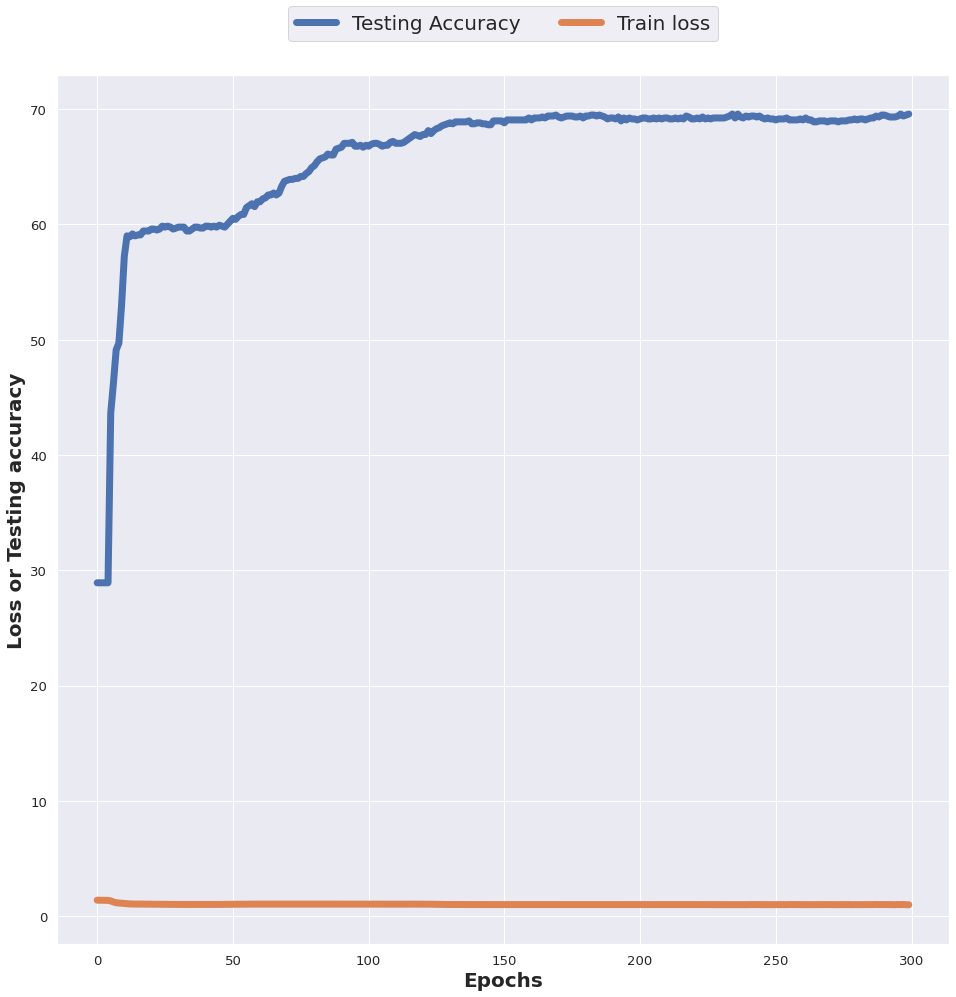

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [i for i in range(300)]


sns.set(rc={'figure.figsize':(16,16) },font_scale=1.2)
fig, ax0 = plt.subplots(1, 1)

y1 = accList_7_lab

    #print(y)
var = 7

# plotting strip plot with seaborn
sns.lineplot(x, y1,ax=ax0,linewidth = var)


y2 = lossList_7_lab
#print(y)

sns.lineplot(x, y2, ax = ax0,linewidth = var)

# giving labels to x-axis and y-axis
ax0.set(xlabel ='Epochs', ylabel ='Loss or Testing accuracy')

ax0.set_xlabel(ax0.get_xlabel(), fontdict={'weight': 'bold'}, fontsize = 20)
ax0.set_ylabel(ax0.get_ylabel(), fontdict={'weight': 'bold'},fontsize = 20)
ax0.legend(['Testing Accuracy', 'Train loss'],fontsize = 20,loc='upper center',bbox_to_anchor=(0.5, 1.09),
ncol=2)

plt.savefig('lablight'+'.PNG', bbox_inches = "tight")
    

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as snsfrom 
from sklearn import datasets
from sklearn import manifold

In [153]:

features, target = data
target = target.astype(int)

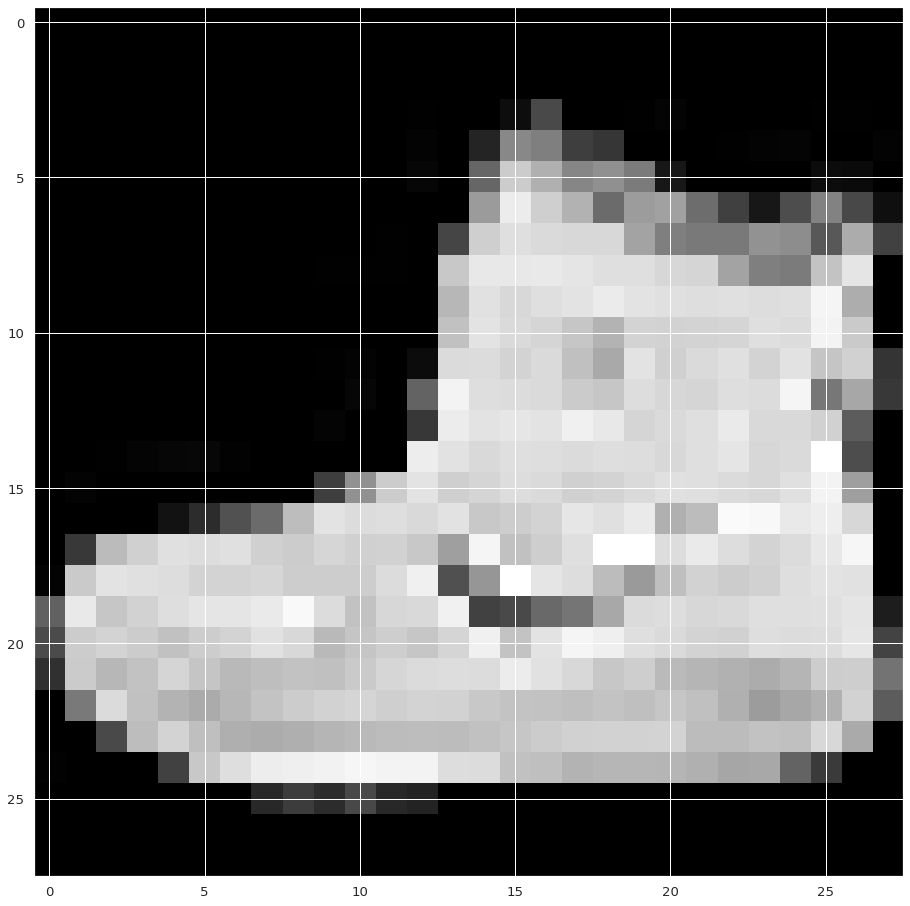

In [154]:
image = features.iloc[0].values.reshape(28, 28)
plt.imshow(image, cmap='gray')

In [155]:
# dimensionality reduction using t-SNE
tsne = manifold.TSNE(n_components=2, random_state=42)# fit and transform
mnist_tr = tsne.fit_transform(features[:30000])

In [157]:
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((mnist_tr, 
                                            target.iloc[:30000])))# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

,CP1,CP2,target
0,54.139797,21.089170,9
1,-19.944721,-61.252232,0
2,-29.934254,-12.698971,0
3,-28.727648,-17.991919,3
4,-47.537182,-28.030680,0


In [158]:
clothes_map = {0:'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle Boot'}# map targets to actual clothes for plotting
cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


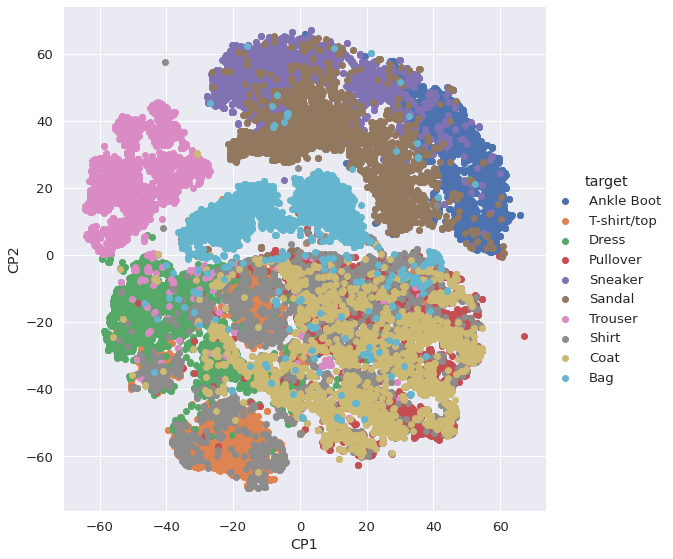

In [160]:
grid = sns.FacetGrid(cps_df, hue="target", size=8)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()